In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from helpers import calc_exp_wait

In [3]:
# read all data

dfs_MM1, dfs_MM2, dfs_MM4 = [], [], []
all_df_lists = [dfs_MM1, dfs_MM2, dfs_MM4]
rho_values = np.array([0.05, 0.2, 0.4, 0.6, 0.8, 0.9, 0.95, 0.99])
service_rate = 2
n_servers = [1, 2, 4]

for rho in rho_values:
    for n, df_list in zip(n_servers, all_df_lists):
        title = f"averages_MM{n}_n250_rho{rho}_max_runtime100000"
        df_list.append(pd.read_csv(f'./data/simulation_averages/{title}.csv', names=['waiting_times', 'queue_lengths'], skiprows=1))

dfs_MM1[0]

,waiting_times,queue_lengths
0,0.025465,0.001733
1,0.022978,0.002119
2,0.026423,0.002822
3,0.024011,0.003200
4,0.024235,0.002313
...,...,...
245,0.026895,0.003300
246,0.027334,0.002204
247,0.025864,0.003620
248,0.024201,0.002200


# Comparison of MM1, MM2, MM4 to theory

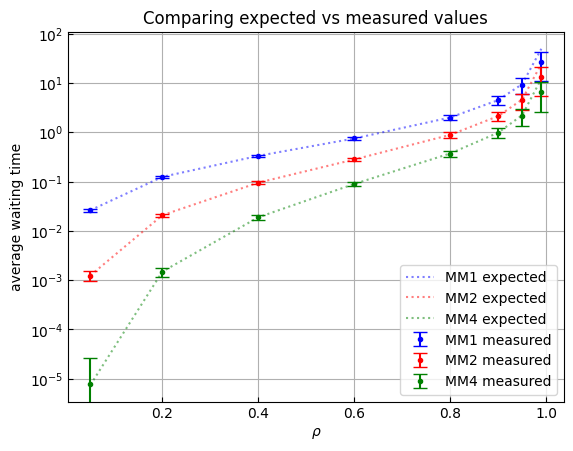

In [4]:
colors = ['blue', 'red', 'green']

for i, df_list in enumerate(all_df_lists):
    measured_waiting_times = [np.mean(df["waiting_times"]) for df in df_list]
    waiting_stds = np.array([np.std(df["waiting_times"]) for df in df_list])

    n_servers = i+1 if i != 2 else 4
    legend_label = f"MM{n_servers}"
    expected_waiting_times = calc_exp_wait(rho=rho_values, c=n_servers, service_rate=service_rate)
    
    plt.plot(rho_values, expected_waiting_times, label=legend_label+" expected", linestyle='dotted', color=colors[i], alpha=0.5)
    plt.errorbar(rho_values, measured_waiting_times, yerr=waiting_stds, fmt='.', capsize=5, label=legend_label+" measured", color=colors[i])

plt.legend()
plt.yscale('log')
plt.xlabel('$\\rho$')
plt.ylabel("average waiting time")
plt.title("Comparing expected vs measured values")
plt.tick_params(direction='in')
plt.grid()
plt.minorticks_off()
plt.show()

In [5]:
# read new data

dfs_MM1_SJF, dfs_MD1 = [], []
rho_values = np.array([0.05, 0.2, 0.4, 0.6, 0.8, 0.9, 0.95, 0.99])
service_rate = 2
two_extra_df_lists = [dfs_MM1_SJF, dfs_MD1]

for rho in rho_values:
    title = f"averages_MM1_n250_rho{rho}_max_runtime100000_SJF"
    dfs_MM1_SJF.append(pd.read_csv(f'./data/simulation_averages/{title}.csv', names=['waiting_times', 'queue_lengths'], skiprows=1))


for rho in rho_values:
    title = f"averages_MD1_n250_rho{rho}_max_runtime100000_FIFO"
    dfs_MD1.append(pd.read_csv(f'./data/simulation_averages/{title}.csv', names=['waiting_times', 'queue_lengths'], skiprows=1))


dfs_MM1_SJF[0]

,waiting_times,queue_lengths
0,0.025192,0.001733
1,0.022636,0.002119
2,0.025853,0.002721
3,0.023487,0.002900
4,0.023642,0.002011
...,...,...
245,0.025893,0.003200
246,0.027093,0.002204
247,0.025076,0.003519
248,0.023742,0.002100


# Comparing waiting times of different queueing systems

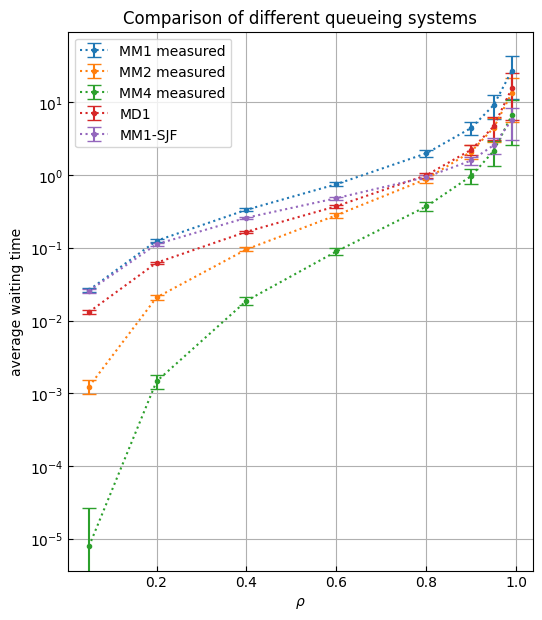

In [6]:
plt.figure(figsize=(6, 7))

# MM1, MM2, MM4
for i, df_list in enumerate(all_df_lists):
    measured_waiting_times = [np.mean(df["waiting_times"]) for df in df_list]
    waiting_stds = np.array([np.std(df["waiting_times"]) for df in df_list])

    n_servers = i + 1 if i != 2 else 4
    legend_label = f"MM{n_servers}"
    expected_waiting_times = calc_exp_wait(rho=rho_values, c=n_servers, service_rate=service_rate)
    plt.errorbar(rho_values, measured_waiting_times, yerr=waiting_stds, fmt='.', capsize=5, label=legend_label+" measured", linestyle='dotted')

# MD1 system
measured_waiting_times = [np.mean(df["waiting_times"]) for df in dfs_MD1]
waiting_stds = np.array([np.std(df["waiting_times"]) for df in dfs_MD1])
plt.errorbar(rho_values, measured_waiting_times, yerr=waiting_stds, fmt='.', capsize=5, label="MD1", linestyle='dotted')

# MM1 SJF
measured_waiting_times = [np.mean(df["waiting_times"]) for df in dfs_MM1_SJF]
waiting_stds = np.array([np.std(df["waiting_times"]) for df in dfs_MM1_SJF])
plt.errorbar(rho_values, measured_waiting_times, yerr=waiting_stds, fmt='.', capsize=5, label="MM1-SJF", linestyle='dotted')

plt.legend()
plt.yscale('log')
plt.xlabel('$\\rho$')
plt.ylabel("average waiting time")
plt.title("Comparison of different queueing systems")
plt.tick_params(direction='in')
plt.grid()
plt.minorticks_off()
plt.show()